<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/lecture6_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from / *Original notebook* by:

**Volodymyr Kuleshov**


## Part 1: Classification

So far, every supervised learning algorithm that we've seen has been an instance of regression.

Next, let's look at some classification algorithms. First, we will define what classification is.

**Regression vs Classification**

Consider a training dataset

$D={(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\ldots,(x^{(n)},y^{(n)})}$

We distinguish between two types of supervised learning problems depending on the targets $y^{(i)}$.

 - **Regression**: The target variable $y \in \mathbf{Y}$ is continuous. $\mathbf{Y} \subset \mathbb{R}$.

 - **Classification**: The target variable $y$ is discrete and takes on e of $\mathit{K}$ possible values: $\mathbf{Y} = \{y_1,y_2,\ldots,y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

**Binary Classification**

An important special case of classification is when the number of classes $K=2$.

In this case, we have an instance of a binary classification problem.

**Classification Dataset: Iris Flowers**

To demonstrate classification algorithms, we are going to use thie iris flower dataset.

It's a classical dataset originally published by R.A. Fisher in 1936. Nowadays, It is widely used for demonstrating machine learning algorithms.



In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris(as_frame=True)

print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
# print part of the dataset
iris_X, iris_Y = iris.data, iris.target
pd.concat([iris_X, iris_Y],axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Here is a visualization of this dataset in 3D. Note that we are using the first 3 features(out of 4) in this dataset.

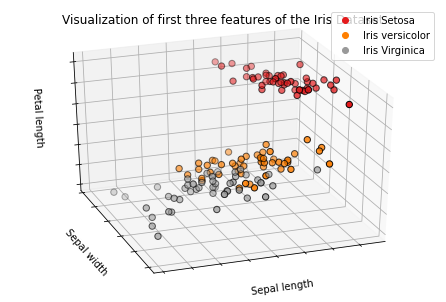

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# let's visualize this dataset

fig = plt.figure()
ax = Axes3D(fig,elev=-150,azim=110)
X_reduced = iris_X.to_numpy()[:,:3]
ax.set_title('Visualization of first three features of the Iris Dataset')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
ax.w_zaxis.set_ticklabels([])
p1 = ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2],c=iris_Y,
                cmap=plt.cm.Set1,edgecolor='k', s=40)
plt.legend(handles=p1.legend_elements()[0],labels=['Iris Setosa', 'Iris versicolor', 'Iris Virginica'])


**Understanding Classification**

How is classification different from regression?

 -  In regression, we try to fit a curve through the set of targets $y^{(i)}$
 - In classification, classes define a partition of the feature space, and our goal is to find the boundaries that separate these regions.
 - Outputs of classification models have a simple probabilistic interpretation: they are probabilities that a data point belongs to a given class.

Lets start by using a toy dataset with 2 features.

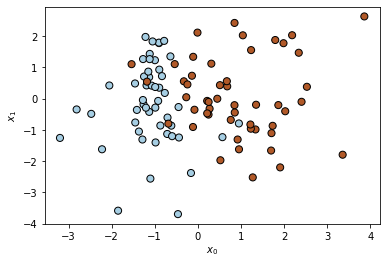

In [4]:
from sklearn.datasets import make_classification

# Generate Binary Classification dataset 
X,y = make_classification(n_samples= 100,n_features=2,n_redundant=0,n_classes=2,random_state = 0)

plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',cmap=plt.cm.Paired,s=50)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')

plt.show()

In [5]:
import pandas as pd
pd.DataFrame(np.c_[X,y])

,0,1,2
0,-0.766055,0.183325,0.0
1,-0.920383,-0.072317,0.0
2,-0.986585,-0.286920,0.0
3,1.709102,-1.104540,1.0
4,1.987647,1.776245,1.0
...,...,...,...
95,-0.989449,0.373436,0.0
96,-0.869385,-0.860700,0.0
97,2.530269,0.380252,1.0
98,-0.461220,-3.697436,0.0


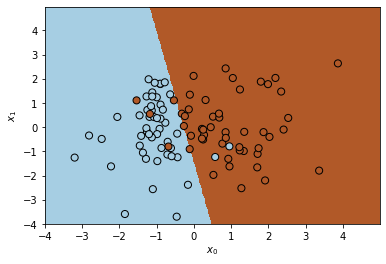

In [6]:
from sklearn.linear_model import LogisticRegression

# create an instance of Logistic Regression Classifier and fit the data
linear_model = LogisticRegression()
linear_model.fit(X,y)

xx, yy = np.meshgrid(np.arange(-4,5,.02),np.arange(-4,5,.02))
Z = linear_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put thre result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

# plot the training points too
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired, s=50)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')

plt.show()

## Part 2: Nearest Neighbor

Previously, we have seen what defines a classification problem. Lets now look at our first classification algorithm.

**A Simple Classification Algorithm: Nearest Neighbour**

Suppose we are given a training dataset 

$D = \{ (x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(n)},y^{(n)}) \}$

At Inference time, we receive a query point $x'$ and we want to predict it's label $y'$.

A really simple but suprisingly effective way of returning $y'$ is the nearest neighbors approach.
- Given a query datapoint $x'$, find the training example $(x,y)$ in $D$ that is closest to $x'$, in the sense that x is 'nearest' to $x'$
-  Return $y$, the label of the 'nearest neighbor' $x$

In the example below on the Iris dataset, the red cross denotes the query $x'$. The closest class to it is 'Viriginica'. ( We are only using the first two features in the dataset for simplicity.)

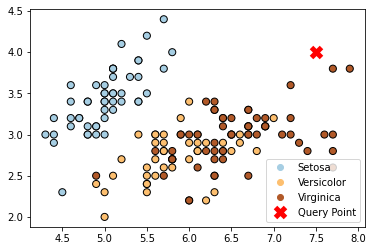

In [7]:
import matplotlib.pyplot as plt

# Plot the training points
p1 = plt.scatter(iris_X.iloc[:,0], iris_X.iloc[:,1],c=iris_Y,edgecolor='k',s=50, cmap=plt.cm.Paired)
p2 = plt.plot([7.5],[4],'rx',ms=10,mew=5)
plt.legend(['Query Point', 'Training Data'],loc='lower right')
plt.legend(handles=p1.legend_elements()[0]+p2,labels=['Setosa','Versicolor','Virginica','Query Point'])

**Choosing a Distance Function**

How do we select the point $x$ that is the closest to the query point $x'$? There are many options.

- The Euclidean distance $||x-x'||_2 = \sqrt{\sum_{j=1}^{d}|x_j -x_j'|^2}$ is a popular choice.
- The Minkowski distance $||x-x'||_p=(\sum_{j=1}^{d}|x_j -x_j|^p)^{1/p}$ generalized the Euclidean, L1 and other distances.
- The Mahalanobis distance $\sqrt{x^T\mathit{V}x}$ for a positive semidefinite matrix $V \in \mathbb{R}^{d \times d}$ also generallizes the Euclidean distance.

Lets apply Nearest Neighbors to the above dataset using the Euclidean distance (or equivalently, Minkowski with p = 2).

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Sepal Width')

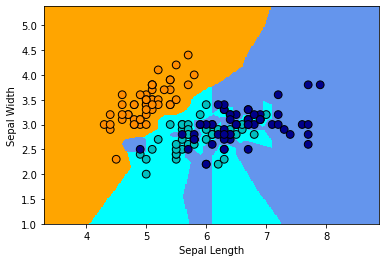

In [8]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

# Train a Nearest Neighbor Model
clf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='minkowski',p=2)
clf.fit(iris_X.iloc[:,:2], iris_Y)

# Create a color map
cmap_light = ListedColormap(['orange','cyan','cornflowerblue'])
cmap_bold = ListedColormap(['darkorange','c','darkblue'])

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max] * [y_min y_max]

x_min, x_max = iris_X.iloc[:,0].min() - 1, iris_X.iloc[:,0].max() + 1
y_min, y_max = iris_X.iloc[:,1].min() - 1, iris_X.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z =  clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z =  Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot also the training points
plt.scatter(iris_X.iloc[:,0], iris_X.iloc[:,1],c=iris_Y, cmap=cmap_bold, edgecolor='k',s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In the above example, the regions of the 2D shape that are assigned to each class are highly irregular. In areas where the two classes overlap, the decision of the boundary flips between the classes, depending on which point is closest to it.

**K-Nearest Neighbors**

Intuitively, we expect the true decision boundary to be smooth. Therefore, we average $K$ nearest neighbors at a query point.

- Given a query datapoint $x'$, find the $K$ training examples $\mathit{N} = \{ (x^{(1)},y^{(1)}), (x^{(2)},y^{(2)})\}, \ldots, (x^{(k)},y^{(k)}) \subset D $ that are closest to $x'$
- Return $y_N$, the consensus label of the neighborhood $N$.

The consensus $y_N$ can be determined by voting, weighted average etc.

Let's look at Nearest Neighbors with a neighborhood of 30. The decision boundary is much smoother than before.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Sepal Width')

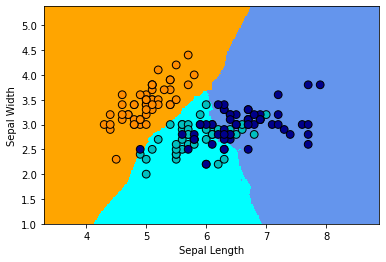

In [9]:
clf = neighbors.KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2 )
clf.fit(iris_X.iloc[:,:2],iris_Y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(iris_X.iloc[:,0], iris_X.iloc[:,1], c=iris_Y, cmap=cmap_bold,
            edgecolor='k', s=60)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

**Review: Data Distribution**

We will assume that the dataset is governed by a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as 
$$
  x,y \sim \mathbb{P}
$$

The training set $\mathcal{D} = {(x^{(i)},y^{(i)},i=1,2,\ldots,n)}$ consists of *independently and identically distributed* (IID) samples from $\mathbb{P}$.

**KNN estimates Data Distribution**

Suppose that the output $y'$ of KNN is the average target in the neighborhood $\mathcal{N}(x')$ around the query $x'$. Observe that we can write:

$$
y' = \frac{1}{k} \sum_{(x,y)\in\mathcal{N(x')}}y \approx \mathbb{E}[y|x']
$$
- when $x \approx x'$ and when $\mathbb{P}$ is reasonably smooth, each $y$ for $(x,y) \in \mathcal{N(x')}$ is approximately a sample from $\mathbb{P}(y|x')$ (since $\mathbb{P}$ does not change much around $x'$).
- Thus, $y'$ is essentially a Monte Carlo estimate $\mathbb{E}[y|x']$ ( the average of $K$ samples from $\mathbb{P}(y|x')$.

**Algorithm: K-Nearest Neighbors**
 - **Type** Supervised Learning (regression and classification)
 - **Model family** Consensus over $K$ training instances
 - **Objective function** Euclidean, Minkowski, Hamming etc
 - **Optimizer** Non at training. Nearest neighbor search at inference using specialized search algorithms (Hashing, KD-Trees).
 - **Probabilistic Interpretation** Directly approximating the density $P_{data}(y|x)$

**Pros and Cons of KNN**

Pros:
 - Can approximate any data distribution arbitrarily weel

Cons:
 - Need to store the entire dataset to make queries, which is computationally prohibitive
 - Number of data needed scale exponentially with dimension (*curse of dimensionality*)

**Non-Parametric Models**

 Nearest neighbor is an example of a *non-parameteric model*. Parametric vs. non-Parametric is a key distinguishing characteristic for machine learning models.

 A parametric model $f_\theta(x): \mathcal{X} \times \Theta \rightarrow \mathcal{Y}$ is defined by a finite set of parameters $\theta \in \Theta$ whose dimensionality is constant with respect to the dataset. LInear models of the form $f_\theta(x)=\theta^Tx$ is an example of a parametric model.
 
In a non-parametric model, the function $f$ uses the entire training dataset(or a post-processed version of it) to make predictions, as in $K$-neares neighbors. In other words, the complexity of the model increases with dataset size.

Non-parametric models have the advantage of not loosing any information at training time. However, they are also computationaly less tractable and may easily overfit the training data.



## Part 3: Logistic Regression

Next, we are going to see a simple parametric classification algorithm that addresses many of the these limitations of Nearest Neighbors.



**Linear Regression is not suitable for Classification**
- does not respect the fact the $0 \leq P(X=x) \leq 1$
- This is not optimial: the points are too close to the decision boundary

Text(0, 0.5, 'y')

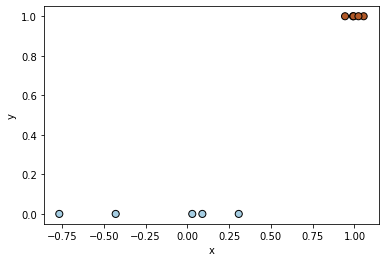

In [10]:
from sklearn.datasets import make_classification

# Generate binary classification dataset
X,y = make_classification(n_samples=10,n_features=1,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=0)

# plot the data
plt.scatter(X,y,c=y,cmap=plt.cm.Paired,s=50,
            edgecolors='k')
plt.xlabel(r'x')
plt.ylabel(r'y')

Text(0, 0.5, 'y')

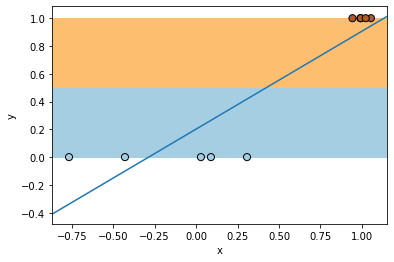

In [11]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Fit Linear Regression Model
regressor = LinearRegression()
regressor.fit(X,y)

# Plot the regression line.
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
h = 0.02 # step size in the mesh
xx= np.arange(x_min, x_max, h)
Z = regressor.predict(xx.reshape(-1,1))
plt.plot(xx, Z)

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max] x [y_min, y_max]
y_min, y_max = 0, 1
yy = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(xx, yy)
y_proba = yy.ravel()
y_proba[y_proba>0.5] = 1
y_proba[y_proba<0.5] = 0

# put the result into a color plot
y_proba = y_proba.reshape(xx.shape)
plt.pcolormesh(xx,yy,y_proba,cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X, y, c=y, edgecolors='k', cmap=plt.cm.Paired, s=50)
plt.xlabel(r'x')
plt.ylabel(r'y')

**The Logistic Function**


To address this problem, we will look at a different hypothesis class. We will choose models of the form:

$$
f(x) = \sigma (\theta^Tx) = \frac{1}{1+\exp(-\theta^Tx)}
$$
where $\sigma(z) = 1 / (1 + \exp(-z))$ is known as the sigmoid function or, more generally, logistic function.

The logistic function $\sigma:\mathbb{R} \rightarrow [0,1]$ "squeezes" points from the real line into $[0,1]$.


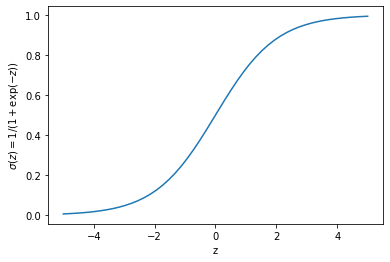

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1/(1+np.exp(-z))

z = np.linspace(-5,5)
plt.plot(z,sigmoid(z))
plt.xlabel('z')
plt.ylabel(r'$\sigma(z)=1/(1+\exp{(-z)})$')
plt.show()

A few observations:
- $\sigma(z)$ tends to 1 as $z \rightarrow \infty$, $\sigma(z)$ tends to 0 as $z \rightarrow -\infty$
- Thus, models of the form $\sigma(\theta^Tx)$ output values between 0 and 1, which is suitable for binary classification
- It is easy to show that the derivative of $\sigma(z)$ has a simple form: 
$$
\frac{\partial \sigma}{\partial z} = \sigma(z)(1-\sigma(z))
$$ 

Lets implement our model using the sigmoid function.

In [13]:
def f(X, theta):
  """ The sigmoid model we are trying to fit
  Parameters
  theta (np.array): d-dimensional vector of parameters
  X (np.array): (n,d)-dimensional data matrix

  Returns:
  y_pred (np.array): n-dimensional vector of predicted targets
  """
  return sigmoid(X.dot(theta))

**Cost function for Classification**

*Why not use MSE as a cost function for classification?*
- MSE is not a convex loss function with respect to the weight $\Theta$.

*Resources*
- http://neuralnetworksanddeeplearning.com/chap3.html

In [14]:
def log_likelihood(theta, X, y):
  """ The cost function, L(theta0, theta1) describing the goodness of fit

  We added the 1e-6 term in order to avoid overflow (inf and -inf)

  Parameters:
  theta (np.array): d-dimensional vector of parameters
  X (np.array): (n,d)-dimensional design matrix
  y (np.array): n-dimensional vector of targets
  """
  eta = 1e-6
  return (y*np.log(f(X, theta) + eta) + (1-y)*np.log(1-f(X,theta) + eta)).mean()

In [17]:
def log_likelihood_gradient(theta, X, y):
  return np.mean((y - f(X, theta)) * X.T, axis=1)

**Gradient Descent for Logistic Regression**

Putting this together, we obtain a complete learning algorithm, logistic regression.

We will use the synthetic Dataset.


Text(0, 0.5, 'y')

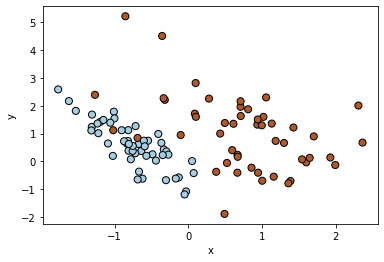

In [15]:
from sklearn.datasets import make_classification

# Generate binary classification dataset
N_SAMPLES = 100
X,y = make_classification(n_samples=N_SAMPLES,n_features=2,n_informative=2,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,class_sep=0.8,random_state=2)

# plot the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,s=50,
            edgecolors='k')
plt.xlabel(r'x')
plt.ylabel(r'y')

In [25]:
threshold = 5e-5
step_size = 1e-1

theta, theta_prev = np.zeros((3,)), np.ones((3,))
opt_pts = [theta]
opt_grads = []
iter = 0
N_TRAIN = int(N_SAMPLES * 0.9)
X_aug = np.c_[np.zeros(X.shape[0]),X]
X_train, y_train = X_aug[:N_TRAIN], y[:N_TRAIN]
X_test, y_test = X_aug[N_TRAIN:],y[N_TRAIN:]

while np.linalg.norm(theta - theta_prev) > threshold:
  if iter % 1000 == 0:
    print(f'Iteration {iter:d}:{log_likelihood(theta, X_train, y_train)}')
  theta_prev = theta
  gradient = log_likelihood_gradient(theta, X_train, y_train)
  theta = theta_prev + step_size * gradient
  opt_pts = [theta]
  opt_grads = [gradient]
  iter += 1

Iteration 0:-0.6931451805619452
Iteration 1000:-0.18558012449583358
Iteration 2000:-0.17826282048633502
Iteration 3000:-0.17662885569558956
Iteration 4000:-0.17612338485153015
Iteration 5000:-0.1759443176322202
Iteration 6000:-0.17587627678118112


Let's now visualize the result.

Text(0, 0.5, '$x_1$')

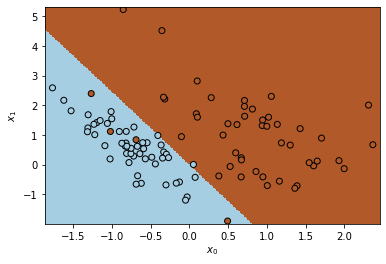

In [31]:
x0_min, x0_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
x1_min, x1_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max, .02), np.arange(x1_min, x1_max, .02))
Z = f(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()], theta)
Z[Z < 0.5] = 0
Z[Z > 0.5] = 1

# put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

# plot the training points
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap = plt.cm.Paired)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')

**Observation about Logistic Regression**

- Logistic Regression finds a linear decision boundary which is the set of points for which $P(y=1 | x) = P(y = 0 | x)$, or equivalently:

**Multiclass Classification**
Logistic Regression only applies to binary classification problems. What if we have an arbitrary number of classes $K$?

- The simplest approach that can be used with any machine learning algorithm is the *one vs all* approach. we train one classifier for each class to distinguish one class from all the others.

- This works, but looses a valid probabilistic interpretation and is not very elegant.

- Alternately, we may fit a probabilistic model that outputs multi-class probabilities.

**The Softmax function**

The logistic function $\sigma:\mathbb{R}\rightarrow[0,1]$ can be seen as mapping input $z$ to a probability.

Its multiclass extension $\overrightarrow{\sigma}:\mathbb{R}^K \rightarrow [0,1]^K$ maps a K-dimensional input to a K-dimensional vector of probabilities.

i.e. $$\sigma(z) = \exp(z_k) / \sum_{l=1}^K\exp(z_l)$$ We call this the softmax function.

**The Softmax Model**

We can use the softmax function to define a K-class classification model.

In the binary classification setting, we mapped weights $\theta$ and features $x$ into a probability. 

In the multi-class setting, we define a model $f: \mathcal{X} \rightarrow [0,1]^K$ that outputs the probability of class k based on the features $x$ and class-specific weights $\theta_k$.

$$
\sigma(\theta^T_kx)_k = \frac{\exp(\theta^T_kx)}{\sum_{l=1}^K\exp(\theta^T_lx)}
$$

**Softmax Regression**

We again take a probabilistic perspective to derive a $K$-class classification algorithm based on this model.

We will start by using our softmax model to parameterize a probability distribution as follows:

$$
p(y=k|x;\theta)  = \overrightarrow{\sigma}(\theta^Tx)_k
$$

This is called a categorical distribution, and it generalizes the Bernoulli distribution.

Following the principle of maximum likelihood, we want to optimize the following objective defined over a training dataset $\mathcal{D} = {(x^{(1)},y^{(1)}),\ldots,(x^{(n)},y^{(n)})}$.

$$
L(\theta) = \Pi_{i=1}^np(y^{(i)}|x^{(i)};\theta) 
$$